In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_37675_I')

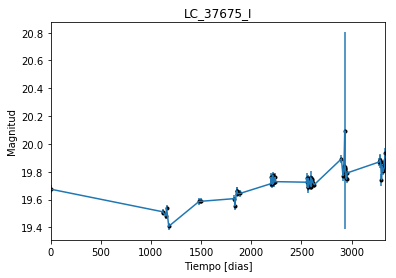

In [2]:
data = np.genfromtxt('LC_37675_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_37675_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

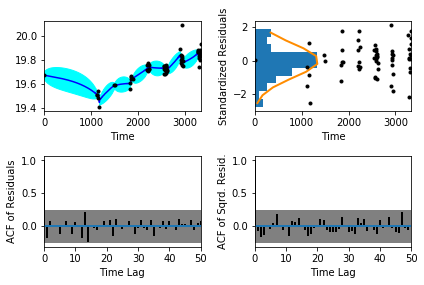

In [5]:
sample.assess_fit()

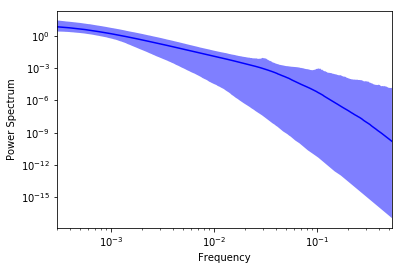

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_37675_I')

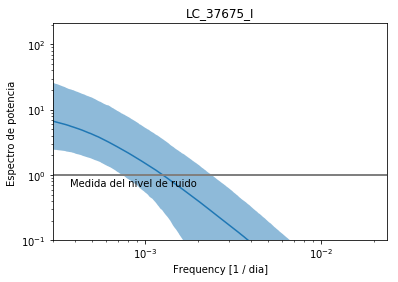

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_37675_I')

Text(0.5,1,'Prediccion , valor esperado LC_37675_I')

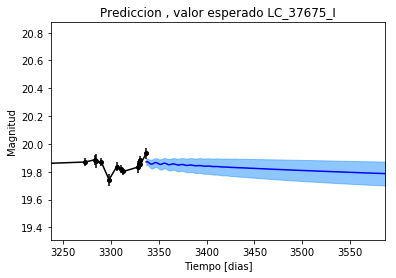

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_37675_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_37675_I')

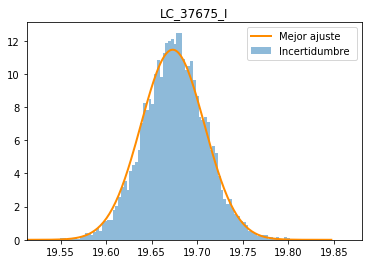

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_37675_I')

Text(0.5,1,'Interpolacion, camino simulado LC_37675_I')

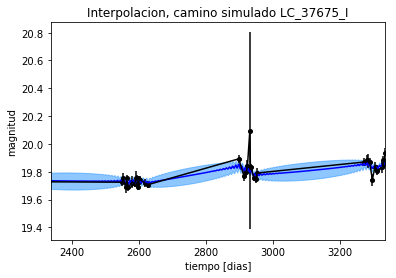

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_37675_I')

Text(0.5,1,'Interpolacion, camino simulado LC_37675_I')

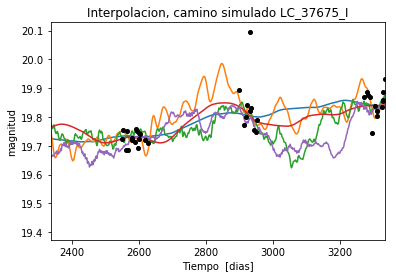

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_37675_I')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 624.914634706
Median: 0.0230608229048
Standard deviation: 0.205163192835
68% credibility interval: [ 0.00198772  0.23301388]
95% credibility interval: [  4.52091535e-04   8.13403053e-01]
99% credibility interval: [  3.13430793e-04   9.96879354e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 430.661933786
Median: 0.00631161217343
Standard deviation: 0.102525845795
68% credibility interval: [ 0.00055272  0.06148061]
95% credibility interval: [  3.23749102e-04   3.35640979e-01]
99% credibility interval: [  3.06207441e-04   7.01396169e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 471.387755638
Median: 0.083920891788
S

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1184.52831046
Median: 127.747533166
Standard deviation: 1.83914588841
68% credibility interval: [ 125.74864875  129.32276243]
95% credibility interval: [ 123.27347608  130.21296451]
99% credibility interval: [ 121.39659283  130.77978136]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 457.868603895
Median: 1.38714291325
Standard deviation: 2.50003829097
68% credibility interval: [ 0.1973427  4.842717 ]
95% credibility interval: [ 0.03091644  8.69159009]
99% credibility interval: [  0.01328193  11.80803084]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 184.829907305
Median: 1.48022007361
Standard deviation: 12.1844183747
68% credibility interval: [  0.11641567  15.71364087]
95% credibility interval: [  5.25596355e-0

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20044.9183022
Median: 1.85934609405e-39
Standard deviation: 3.64779570664e+23
68% credibility interval: [  4.85031289e-90   6.60126696e-17]
95% credibility interval: [  6.45897972e-134   9.84109935e-002]
99% credibility interval: [  3.99713124e-138   4.02191738e+000]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2083.22364715
Median: 19.6902600118
Standard deviation: 0.0620341622301
68% credibility interval: [ 19.63491095  19.74576186]
95% credibility interval: [ 19.5704378   19.81730892]
99% credibility interval: [ 19.51152384  19.88770781]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 531.996547575
Median: 0.0635016887128
Standard deviation: 0.279577311775
68% credibility interval: [ 0.          0.52659564]
95% credibility interval: [ 0.         0.9469076]
99% credibility interval: [ 0.          1.02737113]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 531.996547575
Median: 0.0635016887128
Standard deviation: 0.279577311775
68% credibility interval: [ 0.          0.52659564]
95% credibility interval: [ 0.         0.9469076]
99% credibility interval: [ 0.          1.02737113]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2004.44270814
Median: 0.0
Standard deviation: 0.0001070619127
68% credibil

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1184.52831046
Median: 127.747533166
Standard deviation: 1.83914588841
68% credibility interval: [ 125.74864875  129.32276243]
95% credibility interval: [ 123.27347608  130.21296451]
99% credibility interval: [ 121.39659283  130.77978136]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1348.55869302
Median: 0.0136209388323
Standard deviation: 0.0130310050115
68% credibility interval: [ 0.00874113  0.02368758]
95% credibility interval: [ 0.0059363   0.04700051]
99% credibility interval: [ 0.00474796  0.08436745]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1368.13895661
Median: 1.06404645407
Standard deviation: 0.203065810692
68% credibility interval: [ 0.8848041   1.27871517]
95% credibility interval: [ 0.73667895  1.53454342]
99% credibility interval: [ 0.67499886  1.7026868 ]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 512.97106362
Median: 0.0015968869065
Standard deviation: 0.189111974484
68% credibility interval: [  3.55422758e-05   6.26562138e-02]
95% credibility interval: [  3.59097871e-07   5.50966795e-01]
99% credibility interval: [  2.18693569e-08   1.38259428e+00]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 624.914634706
Median: (-0.144895423647-0.498119395111j)
Standard deviation: 2.17887430887
68% credibility interval: [-1.46406941+0.j         -0.01248922-0.08317814j]
95% credibility interval: [ -5.11076211e+00+0.j          -2.84057489e-03-0.03697292j]
99% credibility interval: [ -6.26357771e+00+0.j          -1.96934375e-03-1.22887902j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 430.661933785
Median: (-0.0396570288727+0.200291822083j)
Standard deviation: 1.87102901155
68% credibility interval: [-0.38629404+2.72700894j -0.00347285+0.j        ]
95% credibility interval: [ -2.10889447e+00+0.85765993j  -2.03417560e-03+0.j        ]
99% credibility interval: [ -4.40700210e+00+5.62724196j  -1.92395810e-03+0.j        ]
Pos